<img src="https://raw.githubusercontent.com/brazil-data-cube/jupyter-gallery/master/img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699"> Web Time Series Service (WTSS) R client</span>
<hr style="border:2px solid #0077b9;">

**W**eb **T**ime **S**eries **S**ervice (WTSS) is a lightweight web service for handling time series data from remote sensing imagery. Given a location and a time interval you can retrieve the according time series as a list of real values.


In WTSS a coverage is a three dimensional array associated to spatial and temporal reference systems (Figure 1).

<img src="https://raw.githubusercontent.com/brazil-data-cube/jupyter-gallery/master/img/image-time-series.png" width="240" />
<br/>
<b>Figura 1</b> - A coverage as a three dimensional array.

WTSS is based on three operations:

- ``list_coverages``: returns the list of all available coverages in the service.

- ``describe_coverage``: returns the metadata of a given coverage.

- ``time_series``: query the database for the list of values for a given location and time interval.

This Jupyter Notebook shows how to use WTSS in Python with Brazil Data Cube data.

# 1. R Client API
<hr style="border:1px solid #0077b9;">

### 1.1 Installation of wtss package <a id="sec-1-1"></a>

In [22]:
# require package
if (!requireNamespace("devtools", quietly = TRUE)) {
    print("Installing devtools package")    
    install.packages(devtools)
}

# installing wtss package
devtools::install_github("e-sensing/wtss", upgrade = "never")

If you are not using the kaggle environment, please install the packages listed below:

In [3]:
# Remove '#' to install the packages
#install.packages(c("magrittr", "dplyr", "tibble"), dependencies = FALSE)

### 1.2 Importing the packages <a id="sec-1-2"></a>

In [21]:
library(wtss)     # Package wtss
library(magrittr) # Package to use pipe operator %>%
library(dplyr)    # Package to handle with data frame
library(tibble)   # Package to represent data frame structure

Before we start, let's create a variable that corresponds to the URL of the INPE WTSS service.

In [5]:
wtss_inpe <- "http://www.esensing.dpi.inpe.br/wtss"

# 2. Listing the Available Data Products
<hr style="border:1px solid #0077b9;">

The function `list_coverages` allows to list the available coverages:

In [6]:
wtss::list_coverages(wtss_inpe)

[1] "MOD13Q1"   "MOD13Q1_M"

The names returned by property can be used in subsequent operations.

The complete documentation of `list_coverages` function can be found using `?wtss::list_coverages`. Like the cell presented bellow:

In [7]:
# ?wtss::list_coverages

# 3. Retrieving the Metadata of a Data Product
<hr style="border:1px solid #0077b9;">

It is possible to access the metadata of a specific coverage with the `describe_coverage` function:

In [8]:
wtss::describe_coverage(wtss_inpe, name = "MOD13Q1")

---------------------------------------------------------------------
WTSS server URL = http://www.esensing.dpi.inpe.br/wtss
Cube (coverage) = MOD13Q1

|satellite|sensor|bands                             |
|:--------|:-----|:---------------------------------|
|TERRA    |MODIS |mir , blue, nir , red , evi , ndvi|


|scale_factors                           |
|:---------------------------------------|
|1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04|


|minimum_values          |
|:-----------------------|
|0, 0, 0, 0, -2000, -2000|


|maximum_values                          |
|:---------------------------------------|
|10000, 10000, 10000, 10000, 10000, 10000|


|nrows|ncols|     xmin|xmax|ymin|ymax|    xres|    yres|crs                                |
|----:|----:|--------:|---:|---:|---:|-------:|-------:|:----------------------------------|
|24000|24000|-81.23413| -30| -40|  10|0.002087|0.002087|+proj=longlat +datum=WGS84 +no_defs|

Timeline - 452 time steps
start_date: 2000-02-18 end_date: 

or:

In [9]:
coverage <- wtss::describe_coverage(wtss_inpe, name = "MOD13Q1_M")

---------------------------------------------------------------------
WTSS server URL = http://www.esensing.dpi.inpe.br/wtss
Cube (coverage) = MOD13Q1_M

|satellite|sensor|bands                   |
|:--------|:-----|:-----------------------|
|TERRA    |MODIS |quality    , reliability|


|scale_factors             |
|:-------------------------|
|1.525925e-05, 3.333333e-01|


|minimum_values|
|:-------------|
|0, 0          |


|maximum_values|
|:-------------|
|65534, 3      |


|nrows|ncols|     xmin|xmax|ymin|ymax|    xres|    yres|crs                                |
|----:|----:|--------:|---:|---:|---:|-------:|-------:|:----------------------------------|
|24000|24000|-81.23413| -30| -40|  10|0.002087|0.002087|+proj=longlat +datum=WGS84 +no_defs|

Timeline - 423 time steps
start_date: 2000-02-18 end_date: 2018-06-26
-------------------------------------------------------------------


The coverage metadata includes its range in the spatial and temporal dimensions, the list of attributes associated to the cells, and the timeline.


Let's inspect the metadata with more detail:

In [10]:
names(coverage)

[1] "URL"            "satellite"      "sensor"         "name"          
 [5] "bands"          "scale_factors"  "missing_values" "minimum_values"
 [9] "maximum_values" "timeline"       "nrows"          "ncols"         
[13] "xmin"           "xmax"           "ymin"           "ymax"          
[17] "xres"           "yres"           "crs"

In [11]:
coverage$name

[1] "MOD13Q1_M"

In [12]:
coverage$satellite

satellite 
  "TERRA"

In [13]:
coverage$sensor

sensor 
"MODIS"

In [14]:
cat("nrows: ", coverage$nrows)
cat("\n")
cat("ncols: ", coverage$ncols)

nrows:  24000
ncols:  24000

In [15]:
cat("xmin: ", paste(coverage$xmin))
cat("\n")
cat("xmax: ", paste(coverage$xmax))
cat("\n")
cat("ymin: ", paste(coverage$ymin))
cat("\n")
cat("ymax: ", paste(coverage$ymax))

xmin:  -81.2341289433377
xmax:  -29.9999999973059
ymin:  -39.9999999964109
ymax:  9.99999999910497

In [16]:
start_date <- min(coverage$timeline[[1]])
end_date <- max(coverage$timeline[[1]])

sprintf("Interval range: [%s, %s]", start_date, end_date)

[1] "Interval range: [2000-02-18, 2018-06-26]"

For more, you can find the complete documentation of `describe_coverage` function in `?wtss::describe_coverage`

# 4. Retrieving the Time Series
<hr style="border:1px solid #0077b9;">

In order to retrieve the time series for attributes `red` and `nir`, in the location of `latitude -12` and `longitude -54` from `January 1st, 2001` to `December 31st, 2001`, use the `time_series` function:

In [17]:
ts <- wtss::time_series(wtss_inpe, 
                        attributes = c("red", "nir"), 
                        latitude   = -12.0, 
                        longitude  = -54.0, 
                        name       = "MOD13Q1",
                        start_date = "2001-01-01",
                        end_date   = "2001-12-31")

The attributes returned from function `time_series` are listed in the cell below:

In [18]:
tibble::glimpse(ts)

Rows: 1
Columns: 7
$ longitude   <dbl> -54
$ latitude    <dbl> -12
$ start_date  <date> 2001-01-01
$ end_date    <date> 2001-12-31
$ label       <chr> "NoClass"
$ cube        <chr> "MOD13Q1"
$ time_series <list> [<tbl_df[23 x 3]>]


Each time series can be accessed by the attribute `time_series`, e.g.:`ts$time_series[[1]]$nir`

In [19]:
ts$time_series[[1]]

Index,red,nir
<date>,<dbl>,<dbl>
2001-01-01,0.0236,0.3463
2001-01-17,0.0289,0.3656
2001-02-02,0.0268,0.2883
2001-02-18,0.0374,0.4130
2001-03-06,0.0484,0.2910
2001-03-22,0.0243,0.3300
2001-04-07,0.0280,0.3281
2001-04-23,0.0199,0.2979
2001-05-09,0.0211,0.2953


For more, you can find the complete documentation of `time_series` function in `?wtss::describe_coverage`

# 5. Visualizing the Time Series with Matplotlib
<hr style="border:1px solid #0077b9;">

The returned time series can be visualized using the `plot` function. Let's visualize the time series we have seen before:

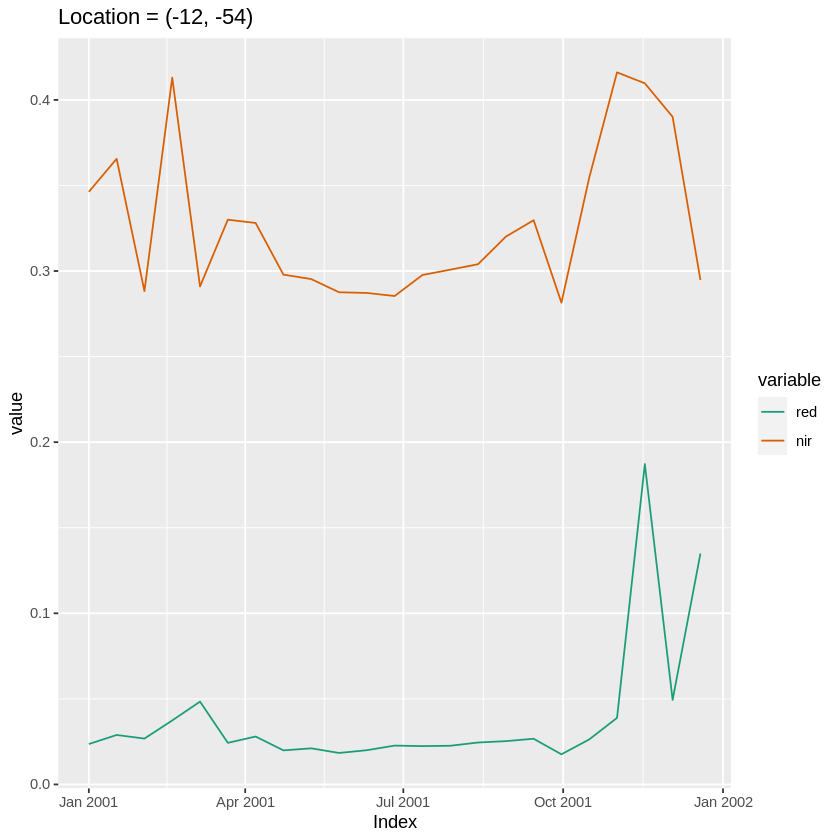

In [20]:
plot(ts)

# 6. References
<hr style="border:1px solid #0077b9;">

- [R Client Library for Web Time Series Service - Github Repository](https://github.com/e-sensing/wtss)


- [WTSS OpenAPI 3 Specification](https://github.com/brazil-data-cube/wtss-spec)


- [WTSS Server](https://github.com/brazil-data-cube/wtss)


- VINHAS, L.; QUEIROZ, G. R.; FERREIRA, K. R.; CÂMARA, G. [Web Services for Big Earth Observation Data](http://www.seer.ufu.br/index.php/revistabrasileiracartografia/article/view/44004). Revista Brasileira de Cartografia, v. 69, n. 5, 18 maio 2017.